# Preparacion de Datos 
### Titanic dataframe

In [1]:
# Importar librerias
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Problema a resolver con los datos
¿Se podra determinar si un pasajero Sobrevivio conociendo los datos personales y datos de embarcacion?


# 1. Cargar Datos

In [2]:
# Cargar archivos
df = pd.read_excel('titanic3.xls')
df.head() # muestra las primeras 5 filas

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Informacion de la tabla

-  class: Passenger class (1 = first; 2 = second; 3 = third)
-  sirvived: (1 if survived or 0 if not)
-  name: Name
-  sex: Sex
-  age: Age
-  sibsp: Number of siblings/spouses aboard
-  parch: Number of parents/children aboard
-  ticket: Ticket number
-  fare: Passenger fare
-  cabin: Cabin
-  embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S =
   Southampton)
-  boat: Lifeboat (if survived)
-  body: Body number (if did not survive and body was recovered)

# 2. Descripcion de datos

In [3]:
# De que tipo son las variables
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [4]:
# Cuantas filas y columnas tiene la tabla
# Filas = Numero de pasajeros
# Col = Numero de atributos
df.shape

(1309, 14)

In [5]:
print('Numero de pasajeros = {}'.format(len(df)))

Numero de pasajeros = 1309


In [6]:
# Que pasa si se eliminan todos las filas y columnas con datos faltantes
df.dropna().shape #dropna metodo borrar los que tienen na. Shape atributo    

(0, 14)

In [7]:
# Realizar un análisis estadístico de las variables numéricas
# Según el tipo 
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [8]:
#Descripción con variables categoricas 
df.describe(include='all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,939,NaN,186,3,28,NaN,369
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


In [9]:
# Donde se subieron los pasajeros
df.embarked.value_counts() #o df['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [10]:
# numero de personas por cabina
df.cabin.value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F4                 4
D                  4
F2                 4
B96 B98            4
F33                4
C78                4
C22 C26            4
C101               3
A34                3
E34                3
B58 B60            3
B51 B53 B55        3
E101               3
F G73              2
C116               2
C124               2
B18                2
C6                 2
D33                2
C93                2
C85                2
E31                2
E44                2
C52                2
C31                2
C2                 2
C46                2
                  ..
B3                 1
C51                1
D9                 1
B10                1
E58                1
E40                1
F                  1
D45                1
F E46              1
B102               1
E17                1
T                  1
D11                1
D46                1
D7                 1
C97                1
C28          

# 3. Preparacion de datos 
## Seleccion de variables
lo hago de primero para liberar memoria al borrar variables que no son necesarias

In [11]:
# Ya se tiene la columna de si la persona sobrevivio, no es necesario las columnas de boat y body
# Se puede borrar la columna, o crear una tabla nueva solo con las columnas necesarias
# Este comando solo se puede ejecutar una vez, luego seria un error por que no existen las columnas
del df['boat'] # borrar por columna
del df['body']
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


In [12]:
# El nombre, el numero del tiquete y cuanto pago por ello no parecen datos relevantes.
df = df.drop(['name','ticket','fare','home.dest'],axis=1) #eliminar varias columnas al mismo tiempo
df.head()

,pclass,survived,sex,age,sibsp,parch,cabin,embarked
0,1,1,female,29.0000,0,0,B5,S
1,1,1,male,0.9167,1,2,C22 C26,S
2,1,0,female,2.0000,1,2,C22 C26,S
3,1,0,male,30.0000,1,2,C22 C26,S
4,1,0,female,25.0000,1,2,C22 C26,S


In [13]:
df.dropna().shape #Eliminar datos na

(270, 8)

## Transformacion de los datos
La mayoria de los datos debe ser numerico para procesarlos,
se convertiran los datos categoricos a numericos

In [14]:
# determinar el tipo de cada uno de los datos
df.dtypes

pclass        int64
survived      int64
sex          object
age         float64
sibsp         int64
parch         int64
cabin        object
embarked     object
dtype: object

In [15]:
# verificar cuantos datos hay de tipo numerico y cuantos tipo object
df.dtypes.value_counts()

int64      4
object     3
float64    1
dtype: int64

Las variables categoricas que entregan informacion que se pueden convertir serian:
- pclass (esta variable se representa por numeros pero es categorica)
- sex
- cabin
- embarked

In [16]:
# get dummies convertir datos categóricos en una variable indicativa.
# Es 1 si cumple la condición y es 0 si no la cumple.
# Numérico a categórico.
dummy_cols = 'pclass,sex,cabin,embarked'.split(",")
df2 = pd.get_dummies(df, columns=dummy_cols)
cols = [c for c in df2.columns if c not in dummy_cols]
X = df2[cols]

In [17]:
X.head()

,survived,age,sibsp,parch,pclass_1,pclass_2,pclass_3,sex_female,sex_male,cabin_A10,...,cabin_F G73,cabin_F2,cabin_F33,cabin_F38,cabin_F4,cabin_G6,cabin_T,embarked_C,embarked_Q,embarked_S
0,1,29.0000,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0.9167,1,2,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,2.0000,1,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,30.0000,1,2,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,25.0000,1,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
# verificar si son numericos
X.dtypes.value_counts()

uint8      194
int64        3
float64      1
dtype: int64

## Limpieza de datos

In [19]:
# Buscar los valores tipo NaN
# verifica en todo el dataframe si la condición es falsa o verdadera
X.isnull()

,survived,age,sibsp,parch,pclass_1,pclass_2,pclass_3,sex_female,sex_male,cabin_A10,...,cabin_F G73,cabin_F2,cabin_F33,cabin_F38,cabin_F4,cabin_G6,cabin_T,embarked_C,embarked_Q,embarked_S
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
# Buscar los valores tipo NaN por columna
# Columnas con valores faltantes
X.isnull().any(axis=0) #columnas axis 0

survived         False
age               True
sibsp            False
parch            False
pclass_1         False
pclass_2         False
pclass_3         False
sex_female       False
sex_male         False
cabin_A10        False
cabin_A11        False
cabin_A14        False
cabin_A16        False
cabin_A18        False
cabin_A19        False
cabin_A20        False
cabin_A21        False
cabin_A23        False
cabin_A24        False
cabin_A26        False
cabin_A29        False
cabin_A31        False
cabin_A32        False
cabin_A34        False
cabin_A36        False
cabin_A5         False
cabin_A6         False
cabin_A7         False
cabin_A9         False
cabin_B10        False
                 ...  
cabin_E39 E41    False
cabin_E40        False
cabin_E44        False
cabin_E45        False
cabin_E46        False
cabin_E49        False
cabin_E50        False
cabin_E52        False
cabin_E58        False
cabin_E60        False
cabin_E63        False
cabin_E67        False
cabin_E68  

In [21]:
# Buscar los valores tipo NaN por fila
# Filas con valores faltantes
X.isnull().any(axis=1) #filas axis 1

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15       True
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1279    False
1280    False
1281    False
1282     True
1283     True
1284     True
1285    False
1286    False
1287    False
1288    False
1289    False
1290    False
1291     True
1292     True
1293     True
1294    False
1295    False
1296    False
1297     True
1298    False
1299    False
1300    False
1301    False
1302     True
1303     True
1304    False
1305     True
1306    False
1307    False
1308    False
Length: 1309, dtype: bool

In [22]:
# Cuales son las Filas con datos faltantes
X[X.isnull().any(axis=1)]

,survived,age,sibsp,parch,pclass_1,pclass_2,pclass_3,sex_female,sex_male,cabin_A10,...,cabin_F G73,cabin_F2,cabin_F33,cabin_F38,cabin_F4,cabin_G6,cabin_T,embarked_C,embarked_Q,embarked_S
15,0,NaN,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
37,1,NaN,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
40,0,NaN,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
46,0,NaN,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
59,1,NaN,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
69,1,NaN,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
70,0,NaN,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
74,0,NaN,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
80,0,NaN,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
106,0,NaN,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
# Que pasa si borro todas las filas con datos incompletos, cuantas filas me quedan?
X.dropna().shape

(1046, 198)

In [24]:
# Como el dato que falta es de la variable edad
# una solucion que no afecta estadisticamente, seria tomar la Mediana de la edad
X['age'].median()

28.0

In [25]:
# Luego se Reemplaza los datos con la media
X['age'] = X['age'].fillna(X['age'].median())
X

,survived,age,sibsp,parch,pclass_1,pclass_2,pclass_3,sex_female,sex_male,cabin_A10,...,cabin_F G73,cabin_F2,cabin_F33,cabin_F38,cabin_F4,cabin_G6,cabin_T,embarked_C,embarked_Q,embarked_S
0,1,29.0000,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0.9167,1,2,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,2.0000,1,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,30.0000,1,2,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,25.0000,1,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1,48.0000,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,1,63.0000,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,39.0000,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8,1,53.0000,2,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,71.0000,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
# Falta algún dato?
X.isnull().any(axis=0).any()

False

# Visualización

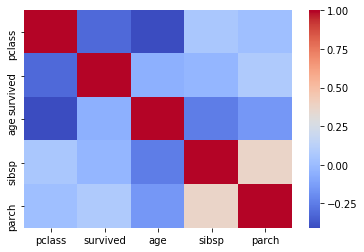

In [27]:
sns.heatmap(df.corr(),cmap='coolwarm')

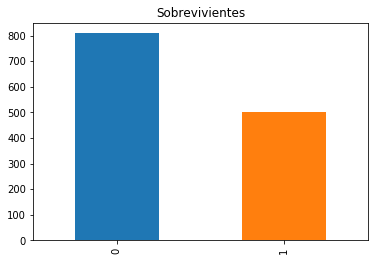

In [28]:
# Cuantas personas sobrevivieron
# Observar los valores de la variable
df['survived'].value_counts().plot(kind='bar',title = 'Sobrevivientes')

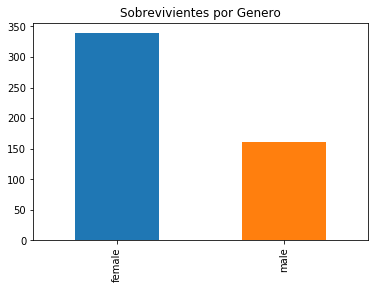

In [29]:
#Sobrevivientes por sexo
df.sex[df.survived==1].value_counts().plot(kind='bar',title = 'Sobrevivientes por Genero')

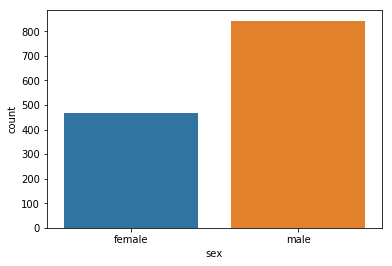

In [30]:
#Cantidad de hombres y mujeres en el barco
sns.countplot(x='sex',data=df)

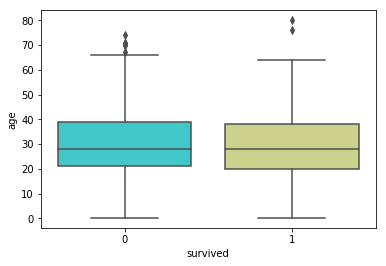

In [31]:
#Sobrevivientes por edad
sns.boxplot(x="survived", y="age", data=df,palette='rainbow')

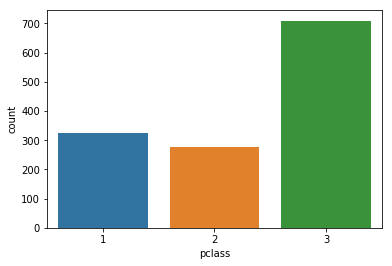

In [32]:
sns.countplot(x='pclass',data=df)

# Conclusiones

- Habia una mayor cantidad de hombres que de mujeres, sin embargo, las mujeres tienen una mayor probabilidad de sobrevivir.
- Los rangos de edades de las personas que sobrevivieron y las que no, son similares.